In [ ]:
using Jenks, PyPlot, StatsBase

In [3]:
N(n,σ,μ) = σ*randn(Int(n)).+μ

N (generic function with 1 method)

In [4]:
data = vcat(N(1e7,3,5),N(1e7,0.5,3),N(1e7,2,-3),N(1e7,0.4,0));
#data = vcat(N(1,-5),N(1,0),N(1,5),N(1,10));

In [5]:
H = fit(Histogram,data,nbins=500);
edges = collect(H.edges[1][1:end-1]);
w = H.weights;

In [14]:
nclasses = 4
JR1 = JenksClassification(nclasses,data,maxiter=1,flux=0.0);
JR2 = JenksClassification(nclasses,data,maxiter=50,errornorm=1,flux=0.01);
JR3 = JenksClassification(nclasses,data,maxiter=50,errornorm=2,flux=0.01);

100%: ARE=1.01119202, finished in 0.16s.
100%: ARE=0.75549890, finished in 8.31s.
100%: GVF=0.91308765, finished in 8.27s.


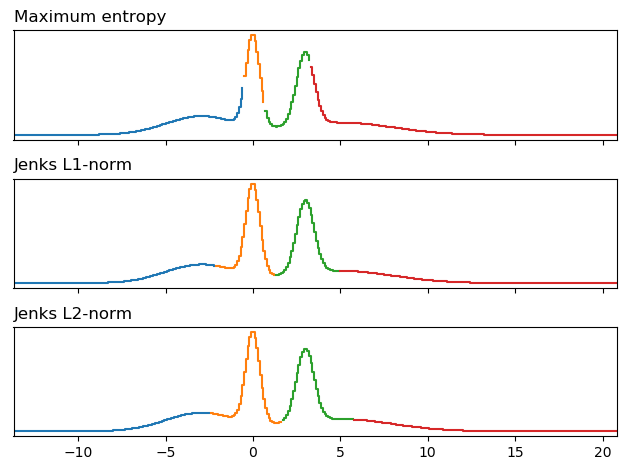

In [15]:
fig,(ax1,ax2,ax3) = subplots(3,1,sharex=true,sharey=true)

for (ax,JR) in zip((ax1,ax2,ax3),(JR1,JR2,JR3))
    for i in 1:nclasses
        inclass = (edges .< JR.bounds[i+1]).*(edges .> JR.bounds[i])
        ax.plot(edges[inclass],w[inclass],drawstyle="steps-post")
    end
end

ax1.set_title("Maximum entropy",loc="left")
ax2.set_title("Jenks L1-norm",loc="left")
ax3.set_title("Jenks L2-norm",loc="left")

yticks([])
xlim(edges[1],edges[end])
tight_layout()